# Apprentissage Supervisé: TP1 - Méthode des K-NN

In [2]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
import time

In [6]:
# Chargement du dataset mnist
mnist = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 
data = mnist[0]
target = mnist[1]

On trouve dans $mnist[0]$  la liste des images (tableaux de pixels), et dans $mnist[1]$ la liste des labels correspondants.

En d'autres termes, le label correspondant à $mnist[0][n]$ est $mnist[1][n]$

# Exercice 1 : Prise en main

## Quelques commandes

In [7]:
#N.B: les pixels sont en niveau de gris (valeur entre 0(noir) - 255(blanc))
print(mnist)        # Affiche la liste de data et la liste de labels correspondants
print(data)         # Affiche la liste de data (tableaux de pixels correspondants aux images)
print(target)       # Affiche la liste des labels correspondant aux data 
len(data)           # Affiche le nombre de données (ici 70 000)
help(len)           # Affiche la documentation de la fonction len
print(data.shape)   # Affiche le format (longueur, largeur) des data (ici, 70 000 données de 784 pixels chacune)
print(target.shape) # Affiche le format des labels (ici, 70 000 labels à la suite)
data[0]             # Retourne la liste de pixels associé à la première donnée
data[0][1]          # Retourne le deuxième pixel de la première image du dataset 
data[:,1]           # Retourne le deuxième pixel de chaque image 
data[:100]          # Retourne les 100 premières images du dataset

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']
Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.

(70000, 784)
(70000,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Visualisation des données

Classe de l'image: 5


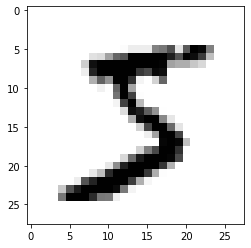

In [8]:
# Transformation des listes de 784 pixels en liste de liste (28x28)
images = data.reshape(-1, 28, 28)

#Affichage de la première image du dataset
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")

# Affichage de la classe de l'image correspondante (label)
print(f"Classe de l'image: {target[0]}")

# Exercice 2: Méthode des K-NN

Dans cet exercice, nous reprenons le dataset MNIST chargé dans l'exercice 1

## 1ère partie: Classifieur k=10

In [9]:
# Séléction de 5000 indices aléatoires (entre 0 et 70 000)
index = np.random.randint(70000, size=5000)

# Attribution des sous-ensembles de data / target
sub_data = data[index]
sub_target = target[index]

# Création du training set (80%) et du testing set (20%)
xtrain, xtest, ytrain, ytest = train_test_split(sub_data, sub_target, train_size = 0.8)

# Création du classifier avec k = 10
k = 10
clf = neighbors.KNeighborsClassifier(k, n_jobs=-1)

# Entrainement du classifieur
clf.fit(xtrain, ytrain)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [10]:
# Prédiction des images du testing set
predictions = clf.predict(xtest)

Classe prédite: 0
Prediction correcte !


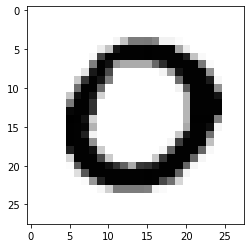

In [11]:
# Prédiction de la classe de l'image 4
print(f"Classe prédite: {predictions[4]}")

# Affichage de l'image 
images_test = xtest.reshape(-1, 28, 28)
plt.imshow(images_test[4],cmap=plt.cm.gray_r,interpolation="nearest")

if predictions[4] == ytest[4]:
    print("Prediction correcte !")
else:
    print("Prediction Incorrecte !")

In [12]:
# Calcul du score sur l'échantillon de test
score_test = clf.score(xtest, ytest)

In [13]:
# Affichage du score sur l'échantillon de test
print(f"Sur l'échantillon de test, on obtient un score de {score_test} ({score_test*100}%) ")

Sur l'échantillon de test, on obtient un score de 0.928 (92.80000000000001%) 


In [14]:
# Calcul du score sur les données d'apprentissage (pour en déduire le taux d'erreur)
score_learning = clf.score(xtrain, ytrain)

In [15]:
# Affichage du score et du taux d'erreur
print(f"Score = {score_learning}")
print(f"Taux d'erreur = {1 - score_learning} ({1 - score_learning}%)")

Score = 0.93725
Taux d'erreur = 0.06274999999999997 (0.06274999999999997%)


On obtient un meilleur score sur le set d' "entrainement". Cela est normal car il s'agit du set ayant les voisins étiquettés correctements (car les labels sont connus) 

## 2ème partie: Classifieur avec K variable

### Variation du nombre de voisins 
Ici, nous allons faire varier le nombre de voisins pour trouver le k optimal

In [58]:
n = 5000
# Séléction de n indices aléatoires (entre 0 et 70 000)
index = np.random.randint(70000, size=n)

# Attribution des sous-ensembles de data / target
sub_data = data[index]
sub_target = target[index]

# Liste des scores obtenues 
scores = []

for k in range(3, 16, 2): # Différents K impairs de 3 à 15
    kf = KFold(n_splits=10, shuffle=True) # Séparation de plusieurs set de training et de tests 
    print(f"k = {k}")
    scores_fold = [] # Liste des scores obtenues sur chaque split
    for train_index, test_index in kf.split(sub_data): 
        # Affectation des différents sets
        xtrain, xtest = sub_data[train_index], sub_data[test_index]
        ytrain, ytest = sub_target[train_index], sub_target[test_index]
        # Création du classifier
        clf = neighbors.KNeighborsClassifier(k, n_jobs=-1)
        # Entrainement du classifieur
        clf.fit(xtrain, ytrain)
        # Calcul du score du classifieur
        score = clf.score(xtest, ytest)
        scores_fold.append(score)
    scores.append((k, max(scores_fold)))
    print(f"score: {scores[-1][1]}")

k = 3
score: 0.952
k = 5
score: 0.948
k = 7
score: 0.944
k = 9
score: 0.956
k = 11
score: 0.948
k = 13
score: 0.932
k = 15
score: 0.932


Le k optimal semble être k = 9

### Variation du pourcentage des échantillons de training et testing set

Ici, nous faisons varier le pourcentage d'images dans le training et testing set, afin de trouver le meilleur compromis.

In [39]:
n = 5000
# Séléction de n indices aléatoires (entre 0 et 70 000)
index = np.random.randint(70000, size=n)

# Attribution des sous-ensembles de data / target
sub_data = data[index]
sub_target = target[index]

k = 9
for test_percentage in range(5, 100, 5): # Différents K impairs de 3 à 15
    train_percentage = (100 - test_percentage) / 100
    print(f"training: {train_percentage*100}%\t test: {test_percentage}%")
    # Affectation des différents sets
    xtrain, xtest, ytrain, ytest = train_test_split(sub_data, sub_target, train_size = train_percentage)
    # Création du classifier
    clf = neighbors.KNeighborsClassifier(k, n_jobs=-1)
    # Entrainement du classifieur
    clf.fit(xtrain, ytrain)
    # Calcul du score du classifieur
    score = clf.score(xtest, ytest)
    print(f"score: {score}\n")

training: 95.0%	 test: 5%
score: 0.908

training: 90.0%	 test: 10%
score: 0.924

training: 85.0%	 test: 15%
score: 0.9173333333333333

training: 80.0%	 test: 20%
score: 0.917

training: 75.0%	 test: 25%
score: 0.9144

training: 70.0%	 test: 30%
score: 0.9206666666666666

training: 65.0%	 test: 35%
score: 0.9102857142857143

training: 60.0%	 test: 40%
score: 0.9105

training: 55.00000000000001%	 test: 45%
score: 0.9102222222222223

training: 50.0%	 test: 50%
score: 0.9056

training: 45.0%	 test: 55%
score: 0.904

training: 40.0%	 test: 60%
score: 0.904

training: 35.0%	 test: 65%
score: 0.8901538461538462

training: 30.0%	 test: 70%
score: 0.8848571428571429

training: 25.0%	 test: 75%
score: 0.8736

training: 20.0%	 test: 80%
score: 0.86275

training: 15.0%	 test: 85%
score: 0.8510588235294118

training: 10.0%	 test: 90%
score: 0.8168888888888889

training: 5.0%	 test: 95%
score: 0.7256842105263158



On remarque qu'avec trop de données d'entrainement, on perd en précision de prédiction (95%).

Nous faisons maintenant varier le paramètre p du classifieur, afin de calculer la distance entre les données en utilisant la distance Euclidienne (p=2), la distance de Manhattan (p=1), ou bien la distance de Minkowski (p>2).

In [42]:
n = 5000
# Séléction de n indices aléatoires (entre 0 et 70 000)
index = np.random.randint(70000, size=n)

# Attribution des sous-ensembles de data / target
sub_data = data[index]
sub_target = target[index]

k = 9
for p in range(1, 4): # Différents paramètres p
    print(f"p: {p}")
    # Affectation des différents sets
    xtrain, xtest, ytrain, ytest = train_test_split(sub_data, sub_target, train_size = 0.8)
    # Création du classifier
    clf = neighbors.KNeighborsClassifier(k, n_jobs=-1, p=p)
    # Entrainement du classifieur
    clf.fit(xtrain, ytrain)
    # Calcul du score du classifieur
    score = clf.score(xtest, ytest)
    print(f"score: {score}\n")

p: 1
score: 0.895

p: 2
score: 0.921

p: 3
score: 0.923



Les meilleures distances semblent être les distances Eclidienne et de Minkowski

Nous allons maintenant mesurer le temps d'éxecution de l'entrainement et du calcul du score, en utilisant 1 coeur (n_jobs=1), puis tous les coeurs (n_jobs=-1)

In [43]:
n = 5000
# Séléction de n indices aléatoires (entre 0 et 70 000)
index = np.random.randint(70000, size=n)

# Attribution des sous-ensembles de data / target
sub_data = data[index]
sub_target = target[index]

k=9
p=2
train_size=0.8

# 1 coeur
print("Execution avec 1 Coeur")

start_time = time.time()
# Affectation des différents sets
xtrain, xtest, ytrain, ytest = train_test_split(sub_data, sub_target, train_size = train_size)
# Création du classifier
clf = neighbors.KNeighborsClassifier(k, n_jobs=1, p=p)
# Entrainement du classifieur
clf.fit(xtrain, ytrain)
# Calcul du score du classifieur
score = clf.score(xtest, ytest)

print(f"Temps d'éxecution: {time.time() - start_time}")


# Tous les coeur
print("Execution avec tous les coeurs")
start_time = time.time()
# Affectation des différents sets
xtrain, xtest, ytrain, ytest = train_test_split(sub_data, sub_target, train_size = train_size)
# Création du classifier
clf = neighbors.KNeighborsClassifier(k, n_jobs=-1, p=p)
# Entrainement du classifieur
clf.fit(xtrain, ytrain)
# Calcul du score du classifieur
score = clf.score(xtest, ytest)

print(f"Temps d'éxecution: {time.time() - start_time}")

Execution avec 1 Coeur
Temps d'éxecution: 3.695591449737549
Execution avec tous les coeurs
Temps d'éxecution: 0.5804717540740967


On remarque que le temps d'éxecution obtenu en parallelisant la création du classifier et le calcul du score est nettement plus court (~ 7x plus rapide). Cela veut dire que la méthode est parallelisable.

## Avantages et Inconvénients

Avantages:
* L'algorithme se comprend facilement
* Il suffit de de savoir placer une donnée pour l'utiliser (pas de biais à appliquer)
* Sur l'exemple de MNIST, l'algoritme offre de très bon résultats (~90% de reconnaissance)

Inconvénients:
* La durée des prédictions est directement liée au nombre de données, ce qui complique le passage à l'echelle
* L'algorithme ne peut pas être utilisé si des prédictions rapides sont necessaires. 